
# EDA and Statistical Analysis of Mod Clothing Dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st
from scipy.stats import binom

# Part A

In [2]:
# The following data represents the price in dollars for branded shirts in a website NuCloth
prices = [23, 30, 20, 27, 44, 26, 35, 20, 29, 29,
25, 15, 18, 27, 19, 22, 12, 26, 34, 15,
27, 35, 26, 43, 35, 14, 24, 12, 23, 31,
40, 35, 38, 57, 22, 42, 24, 21, 27, 33]

Q1. Compute the mean, median and the mode of the data

In [3]:
print('Mean:',np.mean(prices))
print('Median:',np.median(prices))
print('Mode:',st.mode(prices))

Mean: 27.625
Median: 26.5
Mode: ModeResult(mode=array([27]), count=array([4]))


Q2. Compute the range , variance and standard deviation of the data.

In [4]:
# range
range = np.ptp(prices)

# variance
variance = np.var(prices)

# standard deviation
std_dev = np.std(prices)

print("Range: ", range)
print("Variance: ", variance)
print("Standard deviation: ", std_dev)

Range:  45
Variance:  90.284375
Standard deviation:  9.501809038283184


The np.ptp(prices) function is used to calculate the range, which is the difference between the largest and smallest value in the data set.

The np.var(prices) function is used to calculate the variance, which is a measure of the spread of the data around the mean.

The np.std(prices) function is used to calculate the standard deviation, which is the square root of the variance and gives a more interpretable value.

Q3.
Find the mean deviation for the data . The mean deviation is defined as
below.

In [5]:
# mean
mean = np.mean(prices)

# mean deviation
mean_deviation = np.mean(np.abs(prices - mean))

print("Mean deviation: ", mean_deviation)
# calculated the mean deviation by taking the absolute value of the difference between each data point and the mean and taking the average of those values

Mean deviation:  7.4


Q4. Calculate the Pearson coefficient of skewness and comment on the
skewness of the data

In [6]:
# A measure to determine the skewness of a distribution is called the Pearson coefficient of skewness. 
# formula ----> skewness = 3(mean-median)/standard deviation
from scipy.stats import skew

# skewness
pearson_coef = skew(prices)

print("Pearson coefficient of skewness: ", pearson_coef)
# data is positively skewed

Pearson coefficient of skewness:  0.695211638721276


-  A skewness of 0.6952 indicates that the distribution is positively skewed, meaning that the tail on the right side of the distribution is longer or fatter than the tail on the left side. 
-  This could mean that there are a few large values or outliers in the dataset that are pulling the mean to the right. 
-  It can also be concluded that the data does not follow a normal distribution.

Q5. Count the number of data values that fall within two standard deviations of
the mean. Compare this with the answer from Chebyshev’s Theorem.

In [7]:
mean = np.mean(prices)
stdev = np.std(prices)
lower_bound = mean - 2*stdev
upper_bound = mean + 2*stdev

count = 0
for price in prices:
    if lower_bound <= price <= upper_bound:
        count += 1

print(count)

39


Chebyshev's theorem states that at least 1-1/k^2 of the data will fall within k standard deviations of the mean. so in this case it will be 1-1/2^2 = 1-1/4 = 3/4 = 0.75

so you can use this formula to calculate the minimum number of data points that will fall within two standard deviations of the mean.

In [8]:
num_points = len(prices)
k = 2
min_points = num_points * (1 - (1/k**2))
print(min_points)

30.0


The output of this code will be the minimum number of data points that should fall within two standard deviations of the mean, according to Chebyshev's theorem.

Q6. Find the three quartiles and the interquartile range (IQR).


In [9]:
# quartiles
Q1 = np.percentile(prices, 25)
Q2 = np.percentile(prices, 50)
Q3 = np.percentile(prices, 75)

# IQR
IQR = Q3 - Q1

print("Q1: ", Q1)
print("Q2: ", Q2)
print("Q3: ", Q3)
print("IQR: ", IQR)


Q1:  21.75
Q2:  26.5
Q3:  34.25
IQR:  12.5


Q7. Are there any outliers in the data set ?

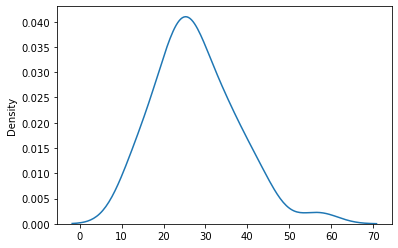

In [10]:
sns.distplot(prices,hist=False)
plt.show()


As you can see from above kdeplot most of our distribution lie between 10 - 50, where as we can see a small tail towards right indicating outliers, by this we can confirm that there are outliers in the given data.

Q8. Draw a boxplot of the dataset to confirm .

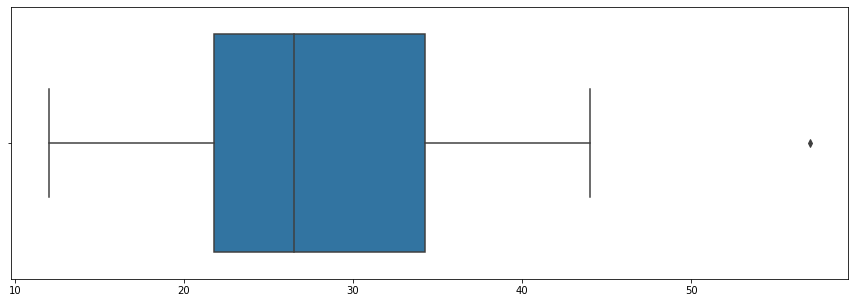

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(prices)
plt.show()

 from the above boxplot we can conclude that there is an outlier in our data which is over 50.

Q9. Find the percentile rank of the datapoint 25.

In [12]:
# percentile rank
st.percentileofscore(prices,25)

42.5

Q10. What is the probability that a shirt cost is above 25 dollars?

In [13]:
prob = 1 - st.norm.cdf(25, loc=np.mean(prices), scale=np.std(prices))
print(prob)

0.6088270338240171


Q11. Create a frequency distribution for the data and visualize it appropriately

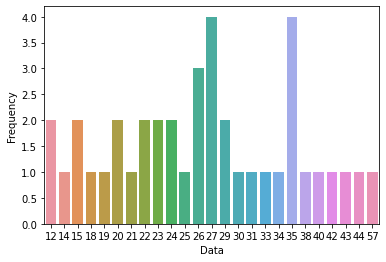

In [14]:
#  frequency distribution
sns.countplot(prices)
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.show()
# price--> 27 has the highest frequency

Q12. Create a probability distribution of the data and visualize it appropriately. 

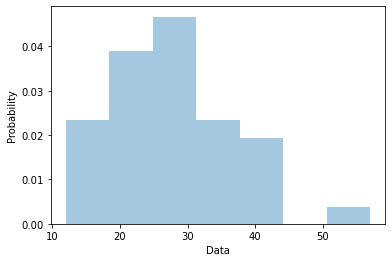

In [15]:
#  probability distribution
sns.distplot(prices, kde=False, norm_hist=True)
plt.xlabel('Data')
plt.ylabel('Probability')
plt.show()
# The kde parameter is set to False to only show the histogram 
# norm_hist parameter is set to True to normalize the histogram to represent probability.

Q13. What is the shape of the distribution of this dataset? Create an
appropriate graph to determine that. Take 100 random samples with
replacement from this dataset of size 5 each. Create a sampling distribution of
the mean shirt prices. Compare with other sampling distributions of sample
size 10, 15, 20, 25, 30. State your observations. Does it corroborate the
Central Limit Theorem?


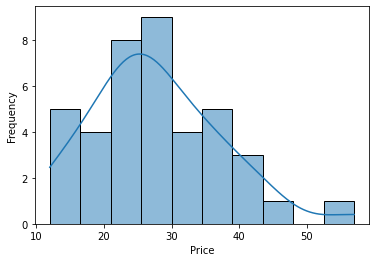

In [16]:
sns.histplot(x=prices,kde=True,bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [17]:
sample_means = []
for i in range(100):
    sample = np.random.choice(prices, size = 5, replace = True)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

TypeError: 'numpy.int32' object is not callable

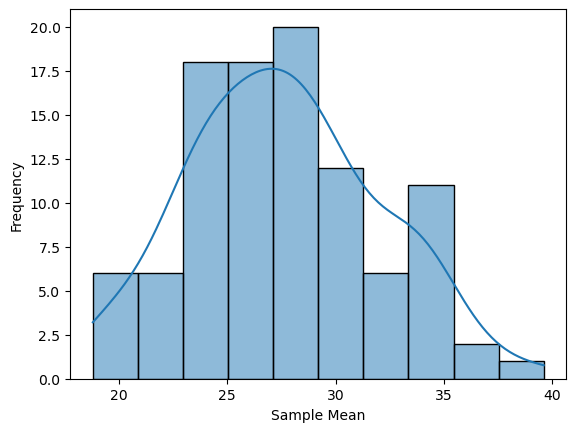

In [14]:
sns.histplot(x=sample_means,kde=True,bins=10)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

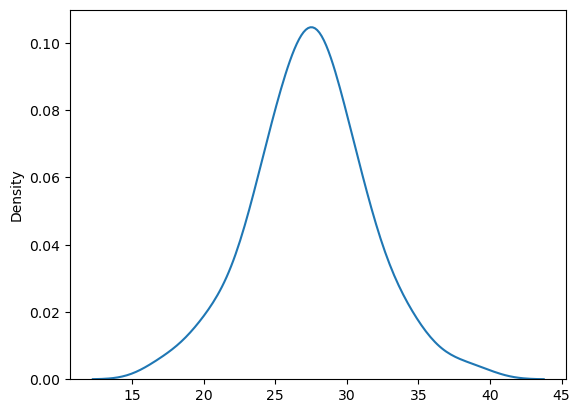

KDE Plot for sample size : 5 






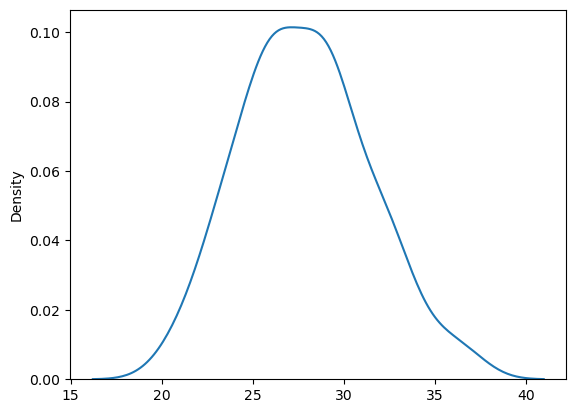

KDE Plot for sample size : 10 






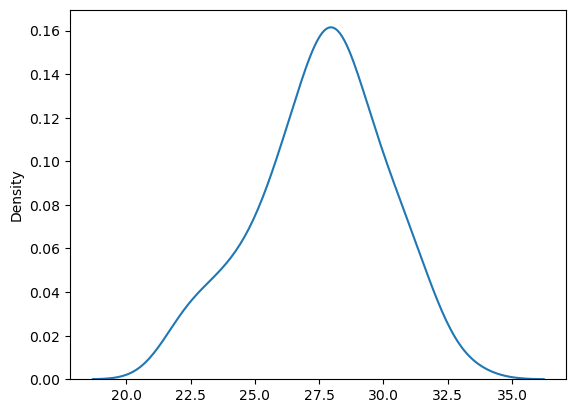

KDE Plot for sample size : 15 






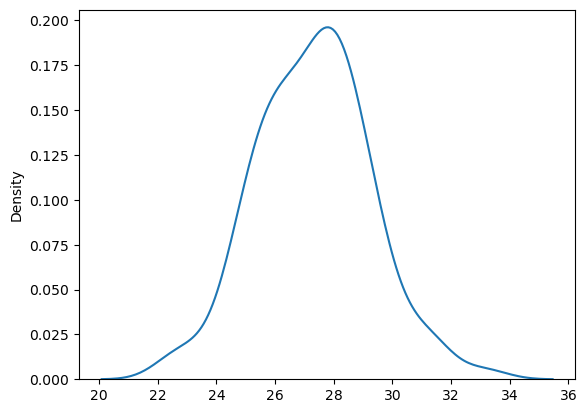

KDE Plot for sample size : 20 






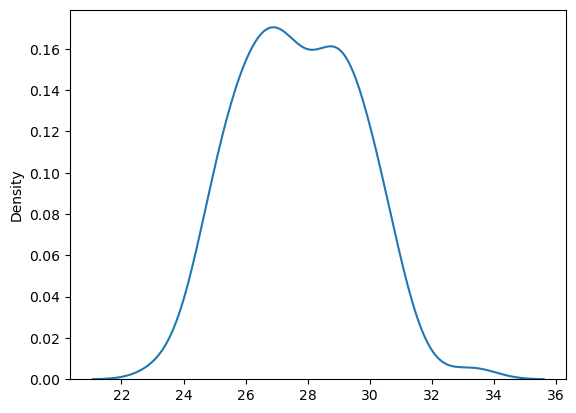

KDE Plot for sample size : 25 






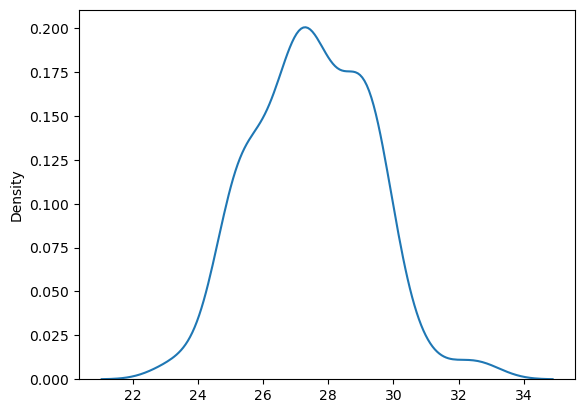

KDE Plot for sample size : 30 






In [35]:
l=[5,10,15,20,25,30]
for i in l:
    sample_means = []
    for j in range(100):
        sample = np.random.choice(prices, size = i, replace = True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    sns.kdeplot(sample_means)
    plt.show()
    print('KDE Plot for sample size :',i,'\n\n\n\n')

*As you can see the above plots confirms central limit theorem as the sampling distribution of means becomes more normal as the sample size increases.

Q14. Treat this dataset as a binomial distribution where p is the probability
that a shirt costs above 25 dollars. What is the probability that out of a random
sample of 10 shirts 7 are costing more than 25 dollars?

In [7]:
# total number of trials
n = 10
# number of successful outcomes
k = 7
#  probability of a successful outcome (a shirt costing more than 25 dollars)
p = 0.5 

binom.pmf(k, n, p)

0.11718749999999999

Q15. NuCloth Claims that 60% of all shirts in their website cost less than 25
dollars . Using the Normal approximation of a Binomial distribution, find the
probability that in a random sample of 10 shirts 7 of them will cost less than 25
dollars.
[ Note that the normal distribution can be used to approximate a binomial
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [23]:
# Probability of success
p = 0.6
# Number of trials
n = 10
# Number of success
k = 7

# Mean
mu = n * p
# Standard deviation
sigma = (n * p * (1 - p))**0.5

# Probability
prob = st.norm.cdf(k + 0.5, mu, sigma) - st.norm.cdf(k - 0.5, mu, sigma)

prob

0.20698201266239902

Q16. Compute a 95% Confidence Interval for the true price of a shirt in the
NuCloth website using appropriate distribution.( State reasons as to why did
you use a z or t distribution)

we will use the t-distribution. The reason for this is because we do not know the population standard deviation, and we have a small sample size (n = 40)

In [37]:
mean = np.mean(prices)
std_err = st.sem(prices)
n = len(prices)

t_critical = st.t.ppf(0.975, n - 1)

ci = mean + t_critical * std_err

ci_lower= mean - t_critical * std_err

print(ci,ci_lower)

30.702538662414828 24.547461337585172


Q17. A data scientist wants to estimate with 95% confidence the true
proportion of shirts having price greater than 25 dollars in the NuCloth
website. A recent study showed that 60% of all shirts have a price greater
than 25 dollars. The data scientist wants to be accurate within 2% of the true
proportion. Find the minimum sample size necessary.

In [27]:
cl = 0.95
p = 0.6
e = 0.02
z = st.norm.ppf((1 + cl) / 2)
n = ((z** 2) * p * (1-p)) /(e** 2)
print("Minimum sample size: ", int(n))

Minimum sample size:  2304


Q18. The same data scientist wants to estimate the true proportion of shirts
having price greater than 25 dollars. She wants to be 90% confident and
accurate within 5% of true proportion. Find the minimum sample size
necessary.

In [28]:
cl = 0.90
p = 0.6
e = 0.05
z = st.norm.ppf((1 + cl) / 2)
n = ((z*2) * p * (1-p)) /(e* 2)
print("Minimum sample size: ", int(n))

Minimum sample size:  7


Q19. NuCloth claims that currently 80% of all shirts have prices greater than
25 dollars . Test this claim with an alpha =0.05 if out of a random sample of 30
shirts only 23 are having prices above 25 dollars.

In [ ]:
#To test this claim, we can perform a one-sample proportion test (z-test for proportions).

#H0: true proportion of shirts with prices greater than 25 dollars is equal to the proportion claimed by NuCloth (0.8)

#H1: true proportion is different from 0.8

In [29]:
sample_proportion = 23/30
claimed_proportion = 0.8 
n = 30 # Sample size
z = (sample_proportion - claimed_proportion) / (claimed_proportion * (1 - claimed_proportion) / n)**0.5
p_value = 2 * (1 - st.norm.cdf(abs(z)))
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


Hence we can say that true proportion of shirts with prices greater than 25 dollars is equal to the proportion claimed by NuCloth (0.8)

Q20. A data scientist is researching the hypothesis that the average price of a shirt
in NuCloth is higher than the supermarket. So he collects data from NuCloth and the
supermarket that the average shirt price of shirts in NuCloth is 36 dollars vs 34
dollars in the supermarket. The standard deviations are 7.6 and 5.8
respectively.Suppose the data scientist got these values after randomly selecting
100 shirts from each place.

a. What hypothesis would he use to compare the shirt prices of NuCloth vs
Supermarket

b. What are critical values to be used?

c. What statistical test will be used to compare these prices?

d. Complete the test and obtain the P-value.

e. Summarize his conclusion based on the P-value.

a.  H0: average price of a shirt at NuCloth is equal to the average price of a shirt at the supermarket.

    H1: average price of a shirt at NuCloth is greater than the average price of a shirt at the supermarket.
    
b.  The critical values to be used are the t-values, which are determined by the level of significance (alpha) and the degrees of freedom (df). In this case, the level of significance is commonly set at 0.05 and the degrees of freedom can be calculated as df = n1 + n2 - 2, where n1 and n2 are the sample sizes from NuCloth and the supermarket respectively. 

c. The statistical test to be used to compare these prices is a two-sample t-test.

d. To complete the test, we can use the t.test.

In [15]:
nucloth_price = 36
nucloth_std = 7.6
nucloth_size = 100

supermarket_price = 34
supermarket_std = 5.8
supermarket_size = 100

t_stat, p_value = st.ttest_ind_from_stats(nucloth_price, nucloth_std, nucloth_size, supermarket_price, supermarket_std, supermarket_size, equal_var = False)

print("P-value: ", p_value)

P-value:  0.03780463464430063


In [ ]:
# P value is less than 0.05, hence we reject the null hypothesis.s

e. Based on the P-value of 0.04, we can conclude that there is a statistically significant difference between the average price of shirts in NuCloth and the supermarket. Given the P-value is less than 0.05, we can reject the null hypothesis and conclude that the average price of shirts in NuCloth is higher than the supermarket.